In [ ]:
import numpy as np
import pandas as pd

data = pd.read_csv("./data/2019-2023가계동향조사.csv", encoding="ANSI")

df = pd.DataFrame(data)
df
# print(df)

,Unnamed: 0,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,...,가계지출_소비지출_기타상품서비스_기타서비스금액구입비,가계지출_비소비지출금액,가계지출_비소비지출_경상조세,가계지출_비소비지출_비경상조세,가계지출_비소비지출_연금기여금,가계지출_비소비지출_사회보장구입비,가계지출_비소비지출_이자비용,가계지출_비소비지출_가구간이전지출금액,가계지출_비소비지출_비영리단체이전지출금액,도시읍면부구분코드
0,0,201900,1,2,1,0,0,2,2,64,...,0,99416,0,15190,0,0,4893,50000,29333,1
1,1,201900,2,1,3,2,0,1,1,63,...,3333,316357,37697,0,0,110160,0,142500,26000,1
2,2,201900,3,2,1,0,0,3,1,58,...,0,9206,0,0,4050,3728,0,0,1429,1
3,3,201900,4,1,3,2,0,1,1,29,...,0,445731,71766,0,245393,104001,4857,7143,12571,1
4,4,201900,5,1,1,1,0,3,2,58,...,525514,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59862,13139,202300,13140,2,1,0,1,3,2,80,...,0,917,917,0,0,0,0,0,0,0
59863,13140,202300,13141,2,2,2,0,3,2,56,...,100,1037004,49973,0,137607,160937,46232,600000,42255,0
59864,13141,202300,13142,2,2,2,1,1,1,73,...,700,1592385,26707,0,0,250047,1632,974000,340000,0
59865,13142,202300,13143,2,3,2,0,1,1,47,...,0,1677890,101673,0,74070,238063,35583,1133333,95167,0


데이터전처리

In [ ]:
#열 변수 변경

df.rename(columns={
    '가계지출금액': '전체소비지출',
    '가계지출_소비지출금액': '소비지출',
    '가계지출_소비지출_식료품비주류음료구입비': '식료품음료구입',
    '가계지출_소비지출_식료품비주류음료_곡물구입비': '식료품_곡물구입',
    '가계지출_소비지출_식료품비주류음료_곡물가공품구입비': '식료품_곡물가공품구입',
    '가계지출_소비지출_식료품비주류음료_빵떡류구입비': '식료품_빵떡류구입',
    '가계지출_소비지출_식료품비주류음료_육류구입비': '식료품_육류구입',
    '가계지출_소비지출_식료품비주류음료_육류가공품구입비': '식료품_육류가공품구입',
    '가계지출_소비지출_식료품비주류음료_신선수산동물구입비': '식료품_신선수산동물구입',
    '가계지출_소비지출_식료품비주류음료_염건수산동물구입비': '식료품_염건수산동물구입',
    '가계지출_소비지출_식료품비주류음료_기타수산동물가공구입비': '식료품_기타수산동물가공구입',
    '가계지출_소비지출_식료품비주류음료_유제품및알구입비': '식료품_유제품알구입',
    '가계지출_소비지출_식료품비주류음료_유지류구입비': '식료품_유지류구입',
    '가계지출_소비지출_식료품비주류음료_과일가공품구입비': '식료품_과일가공품구입',
    '가계지출_소비지출_식료품비주류음료_채소가공품구입비': '식료품_채소가공품구입',
    '가계지출_소비지출_식료품비주류음료_해조가공품구입비': '식료품_해조가공품구입',
    '가계지출_소비지출_식료품비주류음료_당류과자류구입비': '식료품_당류과자류구입',
    '가계지출_소비지출_식료품비주류음료_조미식품구입비': '식료품_조미식품구입',
    '가계지출_소비지출_식료품비주류음료_기타식품구입비': '식료품_기타식품구입',
    '가계지출_소비지출_식료품비주류음료_커피차구입비': '식료품_커피차구입',
    '가계지출_소비지출_식료품비주류음료_쥬스기타음료구입비': '식료품_쥬스음료구입',

    '가계지출_소비지출_주류담배구입비': '주류담배구입',
    '가계지출_소비지출_주류담배_주류구입비': '주류구입',
    '가계지출_소비지출_주류담배_담배구입비': '담배구입',

    '가계지출_소비지출_의류신발구입비': '의류신발구입',
    '가계지출_소비지출_의류신발_직물및외의구입비': '의류신발_직물및외의구입',
    '가계지출_소비지출_의류신발_내의구입비': '의류신발_내의구입',
    '가계지출_소비지출_의류신발_기타의복구입비': '의류신발_기타의복구입',
    '가계지출_소비지출_의류신발_의복관련서비스구입비': '의류신발_의복관련서비스구입',
    '가계지출_소비지출_의류신발_신발구입비': '의류신발_신발구입',
    '가계지출_소비지출_의류신발_신발서비스구입비': '의류신발_신발서비스구입',

    '가계지출_소비지출_주거수도광열비': '주거수도광열비',
    '가계지출_소비지출_주거수도광열_실제주거비구입비': '주거수도광열_실제주거비구입',
    '가계지출_소비지출_주거수도광열_주택유지수선구입비': '주거수도광열_주택유지수선구입',
    '가계지출_소비지출_주거수도광열_상하수도폐기물처리비': '주거수도광열_상하수도폐기물처리',
    '가계지출_소비지출_주거수도광열_기타주거관련서비스구입비': '주거수도광열_기타주거관련서비스구입',
    '가계지출_소비지출_주거수도광열_연료비구입비': '주거수도광열_연료비구입',

    '가계지출_소비지출_가정용품가사서비스이용금액': '가정용품가사서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가구조명구입비': '가정용품가사서비스_가구조명구입',
    '가계지출_소비지출_가정용품가사서비스_실내장식구입비': '가정용품가사서비스_실내장식구입',
    '가계지출_소비지출_가정용품가사서비스_가구조명장식서비스이용금액': '가정용품가사서비스_가구조명장식서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가정용섬유구입비': '가정용품가사서비스_가정용섬유구입',
    '가계지출_소비지출_가정용품가사서비스_가전가정용기기구입비': '가정용품가사서비스_가전가정용기기구입',
    '가계지출_소비지출_가정용품가사서비스_가전관련서비스이용금액': '가정용품가사서비스_가전관련서비스이용',
    '가계지출_소비지출_가정용품가사서비스_가사용품구입비': '가정용품가사서비스_가사용품구입',
    '가계지출_소비지출_가정용품가사서비스_가정용공구기타구입비': '가정용품가사서비스_가정용공구기타구입',
    '가계지출_소비지출_가정용품가사서비스_가사소모품구입비': '가정용품가사서비스_가사소모품구입',
    '가계지출_소비지출_가정용품가사서비스_가사서비스금액': '가정용품가사서비스_가사서비스',

    '가계지출_소비지출_보건제품구입비': '보건제품구입',
    '가계지출_소비지출_보건_의약품구입비': '보건_의약품구입',
    '가계지출_소비지출_보건_의료용소모품구입비': '보건_의료용소모품구입',
    '가계지출_소비지출_보건_보건의료용품기구구입비': '보건_보건의료용품기구구입',
    '가계지출_소비지출_보건_외래의료서비스이용금액': '보건_외래의료서비스이용',
    '가계지출_소비지출_보건_치과서비스이용금액': '보건_치과서비스이용',
    '가계지출_소비지출_보건_기타의료서비스이용금액': '보건_기타의료서비스이용',
    '가계지출_소비지출_보건_입원서비스이용금액': '보건_입원서비스이용',

    '가계지출_소비지출_교통비': '교통비',
    '가계지출_소비지출_교통_자동차구입비': '교통_자동차구입',
    '가계지출_소비지출_교통_기타운송기구구입비': '교통_기타운송기구구입',
    '가계지출_소비지출_교통_운송기구유지수리비': '교통_운송기구유지수리',
    '가계지출_소비지출_교통_운송기구연료비': '교통_운송기구연료',
    '가계지출_소비지출_교통_기타개인교통서비스이용금액': '교통_기타개인교통서비스이용',
    '가계지출_소비지출_교통_철도운송금액': '교통_철도운송',
    '가계지출_소비지출_교통_육상운송금액': '교통_육상운송',
    '가계지출_소비지출_교통_기타운송금액': '교통_기타운송',
    '가계지출_소비지출_교통_기타교통관련서비스이용금액': '교통_기타교통관련서비스이용',

    '가계지출_소비지출_통신비': '통신비',
    '가계지출_소비지출_통신_우편서비스이용금액': '통신_우편서비스이용',
    '가계지출_소비지출_통신_통신장비구입비': '통신_통신장비구입',
    '가계지출_소비지출_통신_통신서비스이용금액': '통신_통신서비스이용',

    '가계지출_소비지출_오락문화비': '오락문화비',
    '가계지출_소비지출_오락문화_영상음향기기구입비': '오락문화_영상음향기기구입',
    '가계지출_소비지출_오락문화_사진광학장비구입비': '오락문화_사진광학장비구입',
    '가계지출_소비지출_오락문화_정보처리장치구입비': '오락문화_정보처리장치구입',
    '가계지출_소비지출_오락문화_기록매체구입비': '오락문화_기록매체구입',
    '가계지출_소비지출_오락문화_영상음향정보기기수리비': '오락문화_영상음향정보기기수리',
    '가계지출_소비지출_오락문화_내구재구입비': '오락문화_내구재구입',
    '가계지출_소비지출_오락문화_악기기구구입비': '오락문화_악기기구구입',
    '가계지출_소비지출_오락문화_오락문화내구재유지수리비': '오락문화_오락문화내구재유지수리',
    '가계지출_소비지출_오락문화_장난감취미용품구입비': '오락문화_장난감취미용품구입',
    '가계지출_소비지출_오락문화_캠핑운동관련용품구입비': '오락문화_캠핑운동관련용품구입',
    '가계지출_소비지출_오락문화_화훼관련용품구입비': '오락문화_화훼관련용품구입',
    '가계지출_소비지출_오락문화_애완동물관련물품구입비': '애완동물_물품구입',
    '가계지출_소비지출_오락문화_화훼애완동물서비스이용금액': '애완동물_서비스이용',
    '가계지출_소비지출_오락문화_운동오락서비스이용금액': '운동오락_서비스이용',
    '가계지출_소비지출_오락문화_문화서비스이용금액': '문화_서비스이용',
    '가계지출_소비지출_오락문화_복권구입비': '복권_구입비',
    '가계지출_소비지출_오락문화_서적구입비': '서적_구입비',
    '가계지출_소비지출_오락문화_기타인쇄물구입비': '인쇄물_구입비',
    '가계지출_소비지출_오락문화_문구구입비': '문구_구입비',
    '가계지출_소비지출_오락문화_단체여행경비': '단체여행_경비'

},inplace=True)

In [ ]:
df.rename(columns={
    '가계지출_소비지출_교육비': '교육비',
    '가계지출_소비지출_교육_정규교육비': '정규교육비',
    '가계지출_소비지출_교육_초등교육비': '초등교육비',
    '가계지출_소비지출_교육_중등교육비': '중등교육비',
    '가계지출_소비지출_교육_고등교육비': '고등교육비',
    '가계지출_소비지출_교육_학원보습교육비': '학원보습교육비',
    '가계지출_소비지출_교육_학생학원교육비': '학생학원교육비',
    '가계지출_소비지출_교육_성인학원비': '성인학원비',
    '가계지출_소비지출_교육_기타교육비': '기타교육비',

    '가계지출_소비지출_음식숙박비': '음식숙박비',
    '가계지출_소비지출_음식숙박_식대': '식대',
    '가계지출_소비지출_음식숙박_숙박비': '숙박비',

    '가계지출_소비지출_기타상품서비스이용금액' : '기타상품서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용서비스이용금액': '이미용서비스이용',
    '가계지출_소비지출_기타상품서비스_이미용기기구입비': '이미용기기구입',
    '가계지출_소비지출_기타상품서비스_위생이미용용품구입비': '위생이미용용품구입',
    '가계지출_소비지출_기타상품서비스_시계장신구구입비': '시계장신구구입',
    '가계지출_소비지출_기타상품서비스_기타개인용품구입비': '기타개인용품구입',
    '가계지출_소비지출_기타상품서비스_복지시설비용금액': '복지시설비용',
    '가계지출_소비지출_기타상품서비스_보험료': '보험료',
    '가계지출_소비지출_기타상품서비스_기타금융구입비': '기타금융구입',
    '가계지출_소비지출_기타상품서비스_기타서비스금액구입비' : '기타서비스금액구입',


    '가계지출_비소비지출금액': '비소비지출금액',
    '가계지출_비소비지출_경상조세': '경상조세',
    '가계지출_비소비지출_비경상조세': '비경상조세',
    '가계지출_비소비지출_연금기여금': '연금기여금',
    '가계지출_비소비지출_사회보장구입비': '사회보장구입비',
    '가계지출_비소비지출_이자비용': '이자비용',
    '가계지출_비소비지출_가구간이전지출금액': '가구간이전지출금액',
    '가계지출_비소비지출_비영리단체이전지출금액': '비영리단체이전지출금액'
},inplace=True)

In [ ]:
# 행 전처리

data = df[['조사연월', '가구일련번호', '가구구분코드', '가구원수', '취업인원수', '노인가구여부', '배우자코드', '가구주_성별코드', '가구주_연령', '가구주_취업여부', '거처구분코드', '자동차보유대수',
           '입주형태코드', '월세평가금액', '전세보증금', '소득구간코드', '전체소비지출', '소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입', '비소비지출금액',
           '비경상조세', '비경상조세', '연금기여금', '사회보장구입비', '이자비용', '가구간이전지출금액', '비영리단체이전지출금액', '도시읍면부구분코드']]


In [ ]:
data = df.copy()

In [ ]:
# #성별 값 전처리
# df['가구주_성별코드'] = df['가구주_성별코드'].replace({1:'남성', 2:'여성'})
# gender = df['가구주_성별코드']
# pd.DataFrame(gender)

In [ ]:
# #조사연월 (201900,202000,202100,202200,202300) --> 2019,2020,2021,2022,2023
df['조사연월'] = df['조사연월'].replace({201900: 2019, 202000 : 2020, 202100 : 2021, 202200 : 2022, 202300:2023})
# #가구주_ 취업여부 값변경 (1,2) --> 취업,비취업
# df['가구주_취업여부'] = df['가구주_취업여부'].replace({1: '취업', 2 : '비취업 '})
# #배우자코드 값변경 1,2,3 --> 있음,있음(비동거), 없음
# df['배우자코드'] = df['배우자코드'].replace({1: '있음(동거)', 2 : '있음(비동거)', 3: '없음'})

# #가구구분코드 1,2 --> 근로자가구, 근로자외 가구
# df['가구구분코드'] = df['가구구분코드'].replace({1: '근로자가구', 2 : '근로자외가구'})

# #노인가구여부 0,1 --> 아님. 해당
# df['노인가구여부'] = df['노인가구여부'].replace({0: '아님', 1 : '해당'})

# #가구주_취업여부 (1:'취업', 2:'비취업')
# df['가구주_취업여부'] = df['가구주_취업여부'].replace({1:'취업', 2:'비취업'})

# #거처구분코드 :
# #(1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타')
# df['거처구분코드'] = df['거처구분코드'].replace({1:'단독주택(다가구주택 포함)',2:'아파트',3:'연립주택',4:'다세대주택',5:'비거주용건물',6:'오피스텔',7:'기타'})

# #입주형태코드 (1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세')
# df['입주형태코드'] = df['입주형태코드'].replace({1:'자기집',2:'무상주택',3:'사택',4:'전세',5:'영구임대',6:'보증부월세',7:'보증금 없는 월세'})

# #소득구간코드 :
# #(1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상')
# df['소득구간코드'] = df['소득구간코드'].replace({1:'100만원 미만', 2:'100~200만원 미만',3:'200~300만원 미만',4:'300~400만원 미만',5:'400~500만원 미만',6:'500~600만원 미만',7:'600~700만원 미만',8:'700만원 이상'})


In [ ]:
age_10 = df[(df["가구주_연령"] >= 10) & (df["가구주_연령"] < 20)]["가구주_연령"]

df.drop(age_10, axis=0, inplace=True)

In [ ]:
#연령별 분류

age = df["가구주_연령"]

def age(age):
    if 20 <= age < 30:
        return '20대'
    elif 30 <= age < 40:
        return '30대'
    elif 40 <= age < 50:
        return '40대'
    elif 50 <= age < 60:
        return '50대'
    elif 60 <= age < 70:
        return '60대'
    else:
        return '70대 이상'



In [ ]:
data = df[['소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입']]

In [ ]:
data

,소비지출,식료품음료구입,식료품_곡물구입,식료품_곡물가공품구입,식료품_빵떡류구입,식료품_육류구입,식료품_육류가공품구입,식료품_신선수산동물구입,식료품_염건수산동물구입,식료품_기타수산동물가공구입,...,기타상품서비스이용,이미용서비스이용,이미용기기구입,위생이미용용품구입,시계장신구구입,기타개인용품구입,복지시설비용,보험료,기타금융구입,기타서비스금액구입
0,451464,153011,0,5553,28736,21273,4350,11770,2683,3267,...,57652,28250,0,6583,0,0,0,22819,0,0
1,1468101,300713,47584,22305,11225,39585,0,29298,5550,9597,...,224028,12833,0,32830,0,20633,0,154398,0,3333
2,1358773,171247,12314,6879,7169,21694,2764,2214,700,14986,...,22133,1571,0,8364,0,0,0,12197,0,0
3,1166942,155088,8554,12763,14940,24717,6094,1811,429,0,...,116307,25143,0,16319,1057,29026,0,44762,0,0
4,5875488,311939,9114,5319,2429,63579,1414,18400,8100,1283,...,888656,66000,2829,65543,5686,213271,0,9728,86,525514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59862,874224,248233,24500,21845,7497,38445,5155,0,3490,0,...,21633,5833,0,12133,3667,0,0,0,0,0
59863,1380757,355633,23587,11182,25467,75625,5228,10133,4000,8333,...,217198,7833,0,18858,0,167,0,190240,0,100
59864,2390831,403937,21197,10423,44500,143938,4780,24833,5833,5073,...,371080,28167,0,2650,0,16667,0,322897,0,700
59865,3606455,583286,1770,33407,13525,128773,36849,61318,3950,10835,...,774415,37100,0,23417,167,1500,401450,310782,0,0


Min-Max Scaler 전처리

In [ ]:
import numpy as np
import pandas as pd

df = pd.DataFrame(df)

columns_to_scale = ['소비지출', '식료품음료구입', '식료품_곡물구입', '식료품_곡물가공품구입', '식료품_빵떡류구입', '식료품_육류구입',
           '식료품_육류가공품구입', '식료품_신선수산동물구입', '식료품_염건수산동물구입', '식료품_기타수산동물가공구입', '식료품_유제품알구입', '식료품_유지류구입', '식료품_과일가공품구입',
           '식료품_채소가공품구입', '식료품_해조가공품구입', '식료품_당류과자류구입', '식료품_조미식품구입', '식료품_기타식품구입', '식료품_커피차구입', '식료품_쥬스음료구입', '주류담배구입',
           '주류구입', '담배구입', '의류신발구입', '의류신발_직물및외의구입', '의류신발_내의구입', '의류신발_기타의복구입', '의류신발_의복관련서비스구입', '의류신발_신발구입', '의류신발_신발서비스구입',
           '주거수도광열비', '주거수도광열_실제주거비구입', '주거수도광열_주택유지수선구입', '주거수도광열_상하수도폐기물처리', '주거수도광열_기타주거관련서비스구입', '주거수도광열_연료비구입',
           '가정용품가사서비스이용', '가정용품가사서비스_가구조명구입', '가정용품가사서비스_실내장식구입', '가정용품가사서비스_가구조명장식서비스이용', '가정용품가사서비스_가정용섬유구입',
           '가정용품가사서비스_가전가정용기기구입', '가정용품가사서비스_가전관련서비스이용', '가정용품가사서비스_가사용품구입', '가정용품가사서비스_가정용공구기타구입', '가정용품가사서비스_가사소모품구입',
           '가정용품가사서비스_가사서비스', '보건제품구입', '보건_의약품구입', '보건_의료용소모품구입', '보건_보건의료용품기구구입', '보건_외래의료서비스이용', '보건_치과서비스이용', '보건_기타의료서비스이용',
           '보건_입원서비스이용', '교통비', '교통_자동차구입', '교통_기타운송기구구입', '교통_운송기구유지수리', '교통_운송기구연료', '교통_기타개인교통서비스이용', '교통_철도운송', '교통_육상운송',
           '교통_기타운송', '교통_기타교통관련서비스이용', '통신비', '통신_우편서비스이용', '통신_통신장비구입', '통신_통신서비스이용', '오락문화비', '오락문화_영상음향기기구입', '오락문화_사진광학장비구입',
           '오락문화_정보처리장치구입', '오락문화_기록매체구입', '오락문화_영상음향정보기기수리', '오락문화_내구재구입', '오락문화_악기기구구입', '오락문화_오락문화내구재유지수리', '오락문화_장난감취미용품구입',
           '오락문화_캠핑운동관련용품구입', '오락문화_화훼관련용품구입', '애완동물_물품구입', '애완동물_서비스이용', '운동오락_서비스이용', '문화_서비스이용', '복권_구입비', '서적_구입비', '인쇄물_구입비',
           '문구_구입비', '단체여행_경비', '교육비', '정규교육비', '초등교육비', '중등교육비', '고등교육비', '학원보습교육비', '학생학원교육비', '성인학원비', '기타교육비', '음식숙박비', '식대', '숙박비',
           '기타상품서비스이용', '이미용서비스이용', '이미용기기구입', '위생이미용용품구입', '시계장신구구입', '기타개인용품구입', '복지시설비용', '보험료', '기타금융구입', '기타서비스금액구입']



min_val = df[columns_to_scale].min()
max_val = df[columns_to_scale].max()

scaled_data = (df[columns_to_scale] - min_val) / (max_val - min_val)

df[columns_to_scale] = scaled_data

df




,Unnamed: 0,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,...,기타서비스금액구입,비소비지출금액,경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드
0,0,2019,1,2,1,0,0,2,2,64,...,0.000000,99416,0,15190,0,0,4893,50000,29333,1
1,1,2019,2,1,3,2,0,1,1,63,...,0.000140,316357,37697,0,0,110160,0,142500,26000,1
2,2,2019,3,2,1,0,0,3,1,58,...,0.000000,9206,0,0,4050,3728,0,0,1429,1
3,3,2019,4,1,3,2,0,1,1,29,...,0.000000,445731,71766,0,245393,104001,4857,7143,12571,1
4,4,2019,5,1,1,1,0,3,2,58,...,0.022080,359537,13844,0,65571,50121,0,57143,172857,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59862,13139,2023,13140,2,1,0,1,3,2,80,...,0.000000,917,917,0,0,0,0,0,0,0
59863,13140,2023,13141,2,2,2,0,3,2,56,...,0.000004,1037004,49973,0,137607,160937,46232,600000,42255,0
59864,13141,2023,13142,2,2,2,1,1,1,73,...,0.000029,1592385,26707,0,0,250047,1632,974000,340000,0
59865,13142,2023,13143,2,3,2,0,1,1,47,...,0.000000,1677890,101673,0,74070,238063,35583,1133333,95167,0


In [ ]:
single_data = df[df["가구원수"]==1]

In [ ]:

grocery = ["식료품_곡물구입","식료품_곡물가공품구입","식료품_빵떡류구입","식료품_육류구입",
                                "식료품_육류가공품구입","식료품_신선수산동물구입","식료품_염건수산동물구입","식료품_기타수산동물가공구입",
                                "식료품_유제품알구입","식료품_유지류구입","식료품_과일가공품구입","식료품_채소가공품구입","식료품_해조가공품구입",
                                "식료품_당류과자류구입","식료품_조미식품구입","식료품_기타식품구입","식료품_커피차구입","식료품_쥬스음료구입"]

alcohol = ["주류구입","담배구입"]

clothing = ["의류신발_직물및외의구입","의류신발_내의구입","의류신발_기타의복구입","의류신발_의복관련서비스구입",
                                "의류신발_신발구입","의류신발_신발서비스구입"]

rws = ["주거수도광열_실제주거비구입","주거수도광열_주택유지수선구입","주거수도광열_상하수도폐기물처리","주거수도광열_기타주거관련서비스구입",
                                "주거수도광열_연료비구입"]

household =  ["가정용품가사서비스_가구조명구입","가정용품가사서비스_실내장식구입","가정용품가사서비스_가구조명장식서비스이용",
                                "가정용품가사서비스_가정용섬유구입","가정용품가사서비스_가전가정용기기구입","가정용품가사서비스_가전관련서비스이용","가정용품가사서비스_가사용품구입",
                                "가정용품가사서비스_가정용공구기타구입","가정용품가사서비스_가사소모품구입","가정용품가사서비스_가사서비스"]

health =  ["보건_의약품구입","보건_의료용소모품구입","보건_보건의료용품기구구입",
                                "보건_외래의료서비스이용","보건_치과서비스이용","보건_기타의료서비스이용","보건_입원서비스이용"]

traffic = ["교통_자동차구입","교통_자동차구입","교통_운송기구유지수리",
                                "교통_운송기구연료","교통_기타개인교통서비스이용","교통_철도운송","교통_육상운송","교통_기타운송","교통_기타교통관련서비스이용"]

cmnct = ["통신_우편서비스이용","통신_우편서비스이용","통신_우편서비스이용"]

culture = ["오락문화_영상음향기기구입","오락문화_사진광학장비구입","오락문화_정보처리장치구입",
                                "오락문화_기록매체구입","오락문화_영상음향정보기기수리","오락문화_내구재구입","오락문화_악기기구구입",
                                "오락문화_오락문화내구재유지수리","오락문화_장난감취미용품구입","오락문화_캠핑운동관련용품구입","오락문화_화훼관련용품구입",
                                "애완동물_물품구입","애완동물_서비스이용","운동오락_서비스이용","문화_서비스이용","복권_구입비","서적_구입비","인쇄물_구입비",
                                "문구_구입비","단체여행_경비"]

edu = ["정규교육비","초등교육비","중등교육비",
                                "고등교육비","학원보습교육비","학생학원교육비","성인학원비","기타교육비"]

lodgment = ["식대","숙박비"]

other_service = ["이미용서비스이용","이미용기기구입","위생이미용용품구입",
                                "시계장신구구입","기타개인용품구입","복지시설비용","보험료","기타금융구입","기타서비스금액구입"]

In [ ]:
grocery_name = "식료품음료구입"
alcohol_name = "주류담배구입"
clothing_name = "의류신발구입"
rws_name = "주거수도광열비"
household_name = "가정용품가사서비스이용"
health_name = "보건제품구입"
traffic_name = "교통비"
cmnct_name = "통신비"
culture_name = "오락문화비"
edu_name = "교육비"
lodgment_name = "음식숙박비"
other_service_name = "기타상품서비스이용"

In [ ]:
single_data[single_data["조사연월"]==2019][grocery]

,식료품_곡물구입,식료품_곡물가공품구입,식료품_빵떡류구입,식료품_육류구입,식료품_육류가공품구입,식료품_신선수산동물구입,식료품_염건수산동물구입,식료품_기타수산동물가공구입,식료품_유제품알구입,식료품_유지류구입,식료품_과일가공품구입,식료품_채소가공품구입,식료품_해조가공품구입,식료품_당류과자류구입,식료품_조미식품구입,식료품_기타식품구입,식료품_커피차구입,식료품_쥬스음료구입
0,0.000000,0.013823,0.027791,0.015142,0.007045,0.019025,0.004523,0.009583,0.010175,0.000000,0.015948,0.005648,0.003134,0.003185,0.001179,0.033180,0.012833,0.014825
2,0.011728,0.017124,0.006933,0.015442,0.004476,0.003579,0.001180,0.043956,0.035827,0.000504,0.028013,0.008684,0.000409,0.023905,0.000297,0.034039,0.004499,0.000709
4,0.008680,0.013241,0.002349,0.045256,0.002290,0.029741,0.013654,0.003763,0.026928,0.001007,0.069205,0.028295,0.004769,0.039288,0.005474,0.011502,0.042426,0.001546
5,0.005397,0.028856,0.010727,0.008826,0.006283,0.000000,0.000000,0.000000,0.011740,0.006102,0.003014,0.006013,0.000000,0.038810,0.002383,0.044736,0.017187,0.051240
12,0.035143,0.007065,0.002863,0.011474,0.003887,0.013933,0.011968,0.002347,0.038199,0.028627,0.007858,0.010273,0.002800,0.014408,0.006624,0.007930,0.005320,0.008589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9499,0.000000,0.044061,0.046470,0.000000,0.000000,0.000000,0.000000,0.008711,0.017058,0.000000,0.016370,0.000594,0.000000,0.000000,0.000000,0.026354,0.046470,0.011651
9500,0.000000,0.020412,0.005222,0.000000,0.003077,0.000000,0.000000,0.010559,0.000874,0.000000,0.065480,0.000000,0.000000,0.017714,0.000000,0.047492,0.003613,0.011818
9501,0.058000,0.016131,0.027273,0.011467,0.009555,0.000000,0.000000,0.000000,0.031669,0.000000,0.000000,0.000000,0.000000,0.073569,0.000000,0.015831,0.001970,0.000000
9504,0.032405,0.025152,0.007990,0.008441,0.000000,0.025054,0.000000,0.000807,0.006100,0.003144,0.003634,0.001590,0.000000,0.004687,0.003348,0.009985,0.039385,0.008637


In [ ]:
# !pip install koreanize-matplotlib

^C


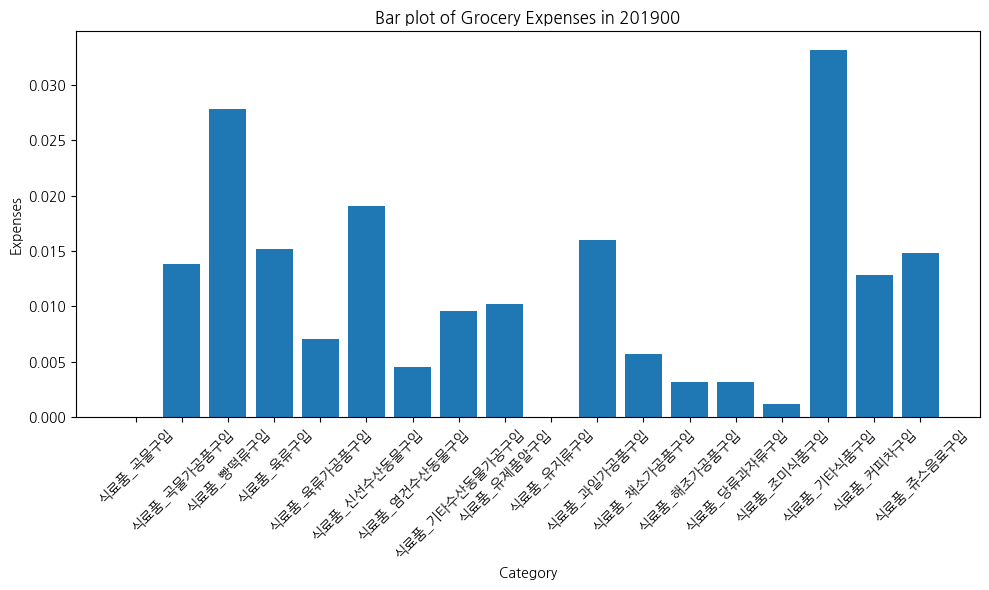

In [ ]:
#2019년도 식료품 합계
import koreanize_matplotlib
import matplotlib.pyplot as plt

# 조건에 맞게 데이터 필터링
filtered_data = single_data[single_data["조사연월"] == 2019][grocery]


plt.figure(figsize=(10, 6))
plt.bar(filtered_data.columns, filtered_data.values[0])
plt.title('Bar plot of Grocery Expenses in 201900')
plt.xlabel('Category')
plt.ylabel('Expenses')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
#상관분석

cov_single_data = single_data[["소비지출",'식료품음료구입','주류담배구입',
        '의류신발구입','주거수도광열비','교육비','음식숙박비','가정용품가사서비스이용',
        '보건제품구입','교통비','통신비','오락문화비', '기타상품서비스이용']]

In [ ]:
cov_single_data.corr(method='pearson')

,소비지출,식료품음료구입,주류담배구입,의류신발구입,주거수도광열비,교육비,음식숙박비,가정용품가사서비스이용,보건제품구입,교통비,통신비,오락문화비,기타상품서비스이용
소비지출,1.000000,0.144021,0.167035,0.398244,0.334444,0.177327,0.473805,0.347506,0.274129,0.682754,0.290196,0.411204,0.424134
식료품음료구입,0.144021,1.000000,-0.078266,0.078394,-0.017126,-0.019322,-0.155941,0.095806,0.141853,-0.024873,-0.062035,-0.009909,0.110058
주류담배구입,0.167035,-0.078266,1.000000,0.017126,0.062863,-0.004150,0.276533,0.020700,-0.038615,0.057481,0.117318,0.049093,0.013458
의류신발구입,0.398244,0.078394,0.017126,1.000000,0.073810,0.089668,0.339637,0.136837,0.058507,0.087683,0.160116,0.199852,0.192988
주거수도광열비,0.334444,-0.017126,0.062863,0.073810,1.000000,0.045663,0.139748,0.071608,-0.011985,0.030827,0.086661,0.052157,0.048215
교육비,0.177327,-0.019322,-0.004150,0.089668,0.045663,1.000000,0.120081,0.009004,-0.006304,0.019075,0.069158,0.067497,0.036400
음식숙박비,0.473805,-0.155941,0.276533,0.339637,0.139748,0.120081,1.000000,0.056923,-0.029924,0.149783,0.272856,0.251160,0.145434
가정용품가사서비스이용,0.347506,0.095806,0.020700,0.136837,0.071608,0.009004,0.056923,1.000000,0.077229,0.026353,0.054699,0.151528,0.111677
보건제품구입,0.274129,0.141853,-0.038615,0.058507,-0.011985,-0.006304,-0.029924,0.077229,1.000000,0.012934,-0.001607,0.002121,0.070897
교통비,0.682754,-0.024873,0.057481,0.087683,0.030827,0.019075,0.149783,0.026353,0.012934,1.000000,0.115829,0.065275,0.061667


교통비(0.68)
음식숙박비(0.47)
기타상품서비스이용(0.42)

In [ ]:
strong_correlation = single_data.corr()

# 가구원수가 1인 경우에 대한 각 변수 간의 상관관계가 0.6 이상인 값을 추출합니다.
sin_strong_corr = strong_correlation[(strong_correlation >= 0.6) | (strong_correlation <= -0.6)]

# 상관관계가 0.6 이상인 변수 쌍 출력
strong_corr_pairs = sin_strong_corr.stack().reset_index()
strong_corr_pairs.columns = ['Variable 1', 'Variable 2', 'Correlation Coefficient']
strong_corr_pairs = strong_corr_pairs[strong_corr_pairs['Correlation Coefficient'] != 1.0]  # 자기 자신과의 상관관계는 제외

strong_corr_pairs

,Variable 1,Variable 2,Correlation Coefficient
6,가구구분코드,취업인원수,-0.734546
7,가구구분코드,가구주_취업여부,0.734546
8,취업인원수,가구구분코드,-0.734546
10,취업인원수,가구주_취업여부,-1.000000
12,노인가구여부,가구주_연령,0.793471
...,...,...,...
210,사회보장구입비,전체소비지출,0.619844
211,사회보장구입비,비소비지출금액,0.686790
212,사회보장구입비,경상조세,0.677483
213,사회보장구입비,연금기여금,0.618636


In [ ]:
# 비소비 제외, 중복출력 제거
strong_corr_pairs = strong_corr_pairs[~strong_corr_pairs['Variable 1'].str.contains('비소비')]
strong_corr_pairs = strong_corr_pairs[~strong_corr_pairs['Variable 2'].str.contains('비소비')]

sin_dat_corr = strong_corr_pairs
sin_dat_corr

# Variable 1과 Variable 2를 정렬하여 중복 제거 후 정렬된 데이터 출력
sin_dat_corr[['Variable 1', 'Variable 2']] = sin_dat_corr[['Variable 1', 'Variable 2']].apply(sorted, axis=1, result_type='expand')
sin_dat_corr = sin_dat_corr.drop_duplicates(subset=['Variable 1', 'Variable 2'])
sin_dat_corr.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)
sin_dat_corr

C:\Users\Master\AppData\Local\Temp\ipykernel_17736\3083467991.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sin_dat_corr.sort_values(by='Correlation Coefficient', ascending=False, inplace=True)


,Variable 1,Variable 2,Correlation Coefficient
164,고등교육비,정규교육비,0.995121
180,식대,음식숙박비,0.987724
116,교통_자동차구입,교통비,0.973728
73,의류신발_직물및외의구입,의류신발구입,0.952099
130,통신_통신장비구입,통신비,0.901764
185,기타상품서비스이용,기타서비스금액구입,0.894268
33,소비지출,전체소비지출,0.857135
67,담배구입,주류담배구입,0.797824
173,성인학원비,학원보습교육비,0.795959
12,가구주_연령,노인가구여부,0.793471


d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


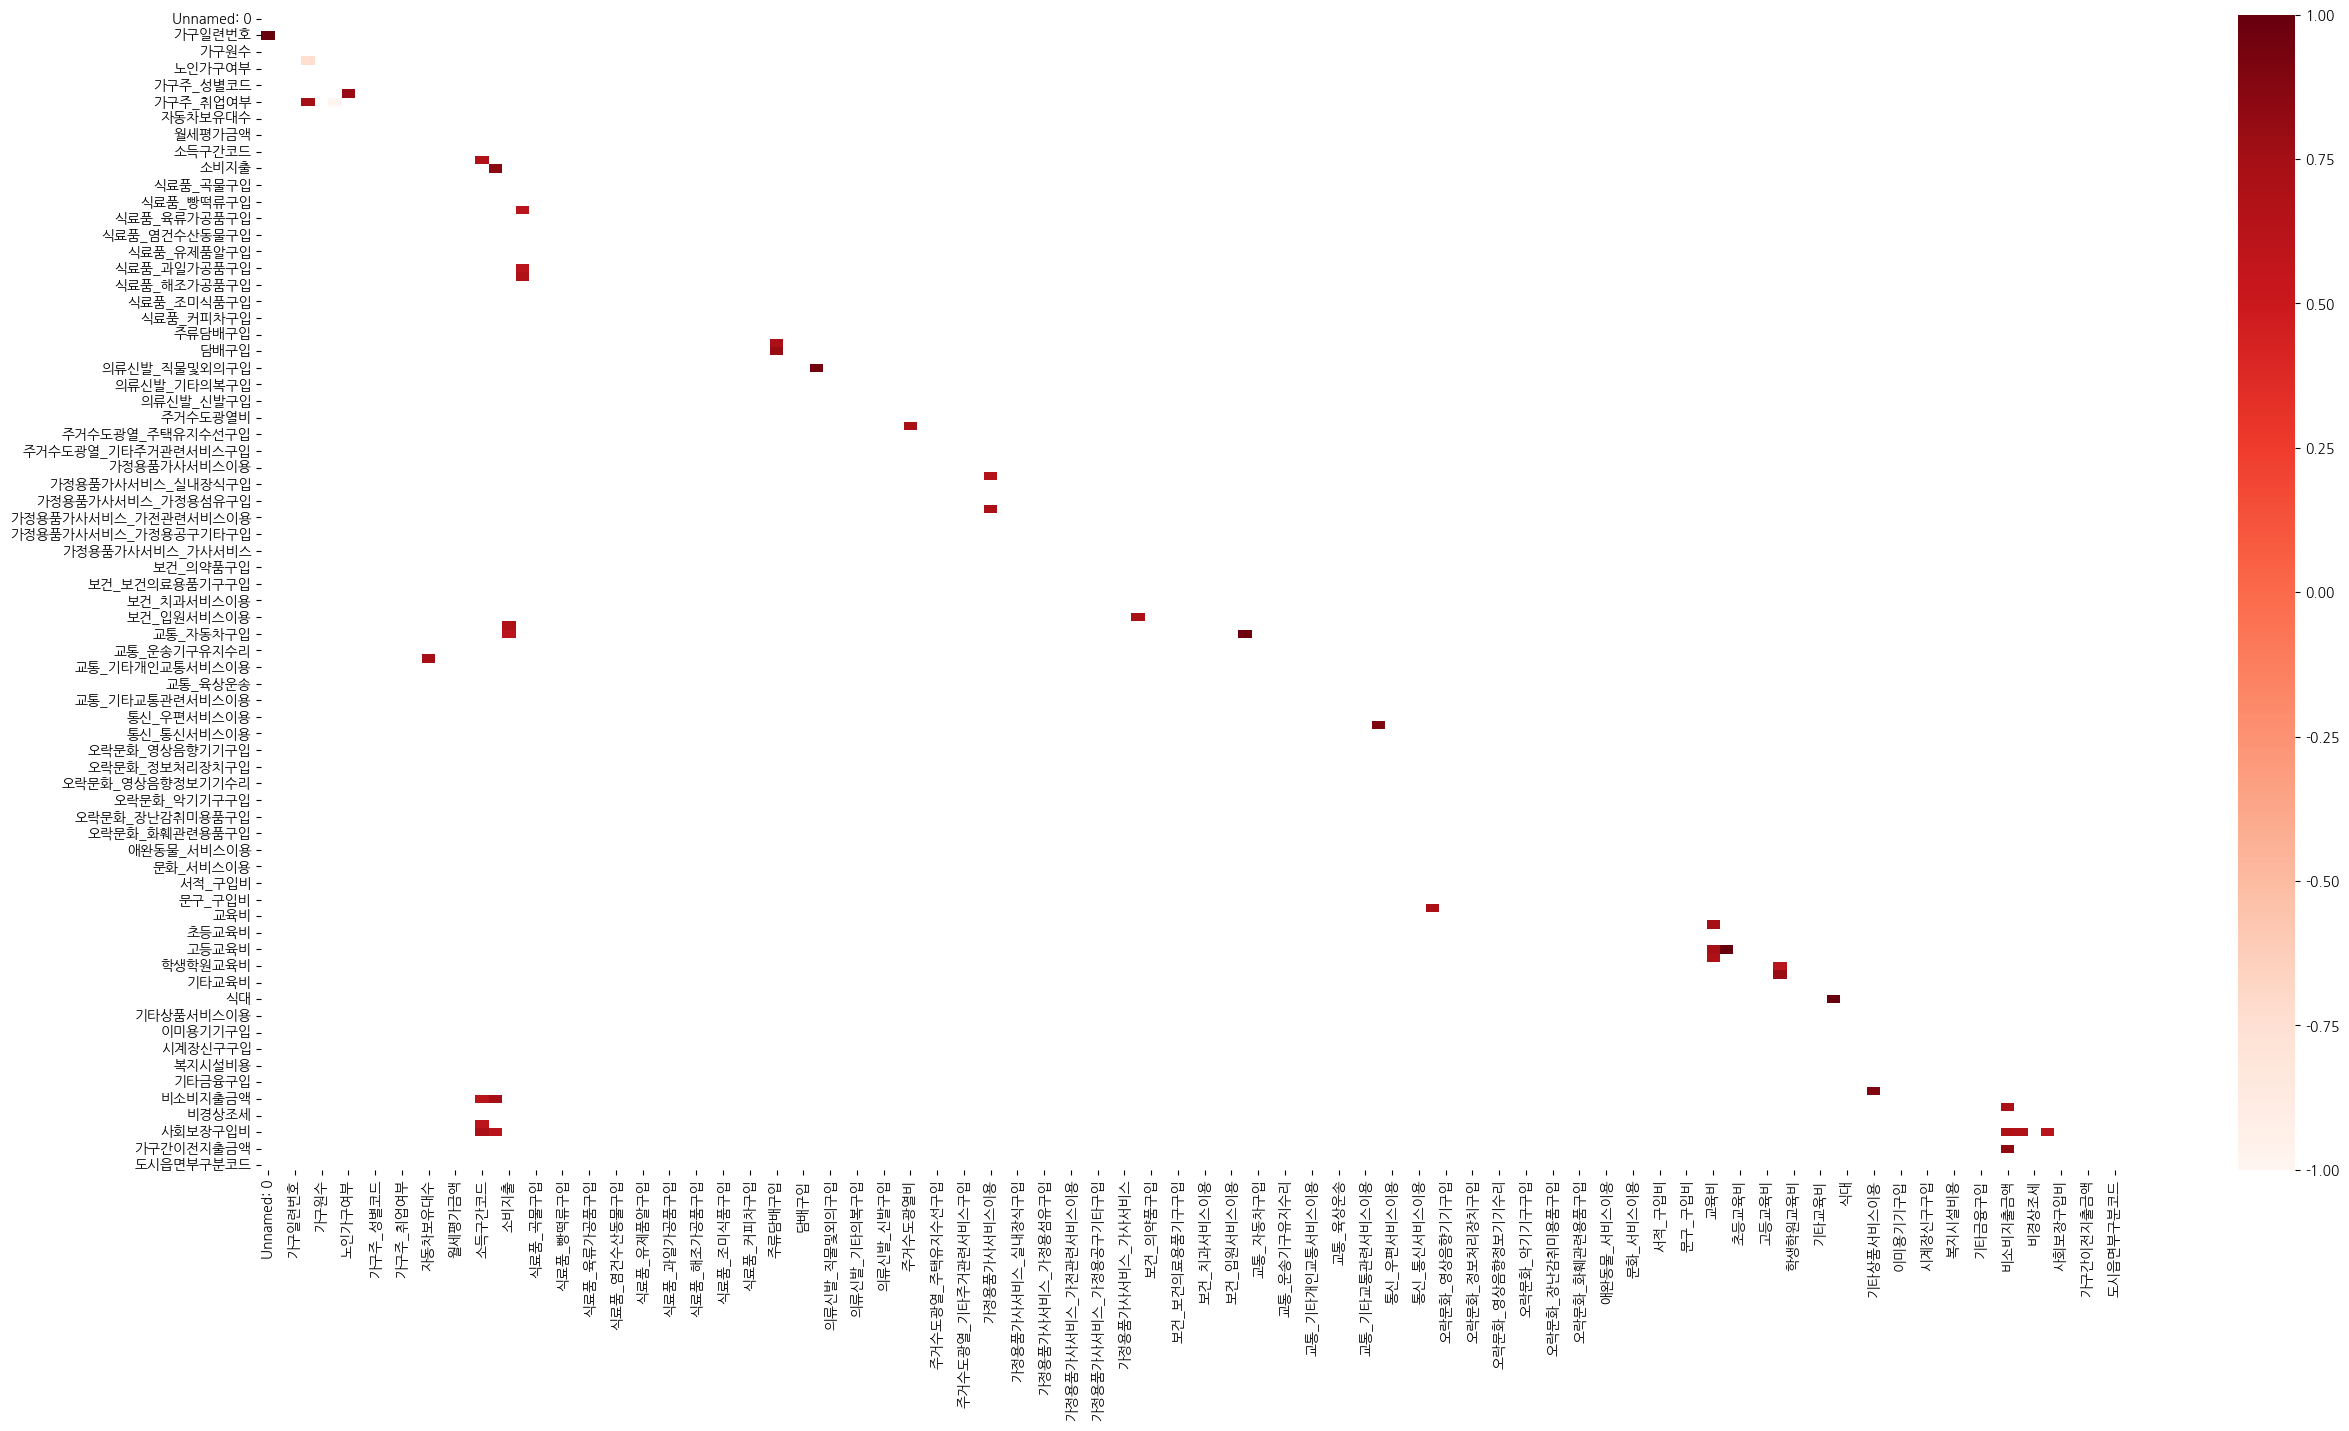

In [ ]:
# 상관관계 0.6인 변수들 출력
import seaborn as sns

plt.figure(figsize=(30, 15))
mask = np.triu(np.ones_like(single_data.corr(), dtype=bool))
strong_correlation = (single_data.corr() >= 0.6) | (single_data.corr() <= -0.6)
sns.heatmap(single_data.corr()[strong_correlation], annot=True, mask=mask, fmt='0.2f', cmap='Reds')
plt.show()

d:\Anaconda\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


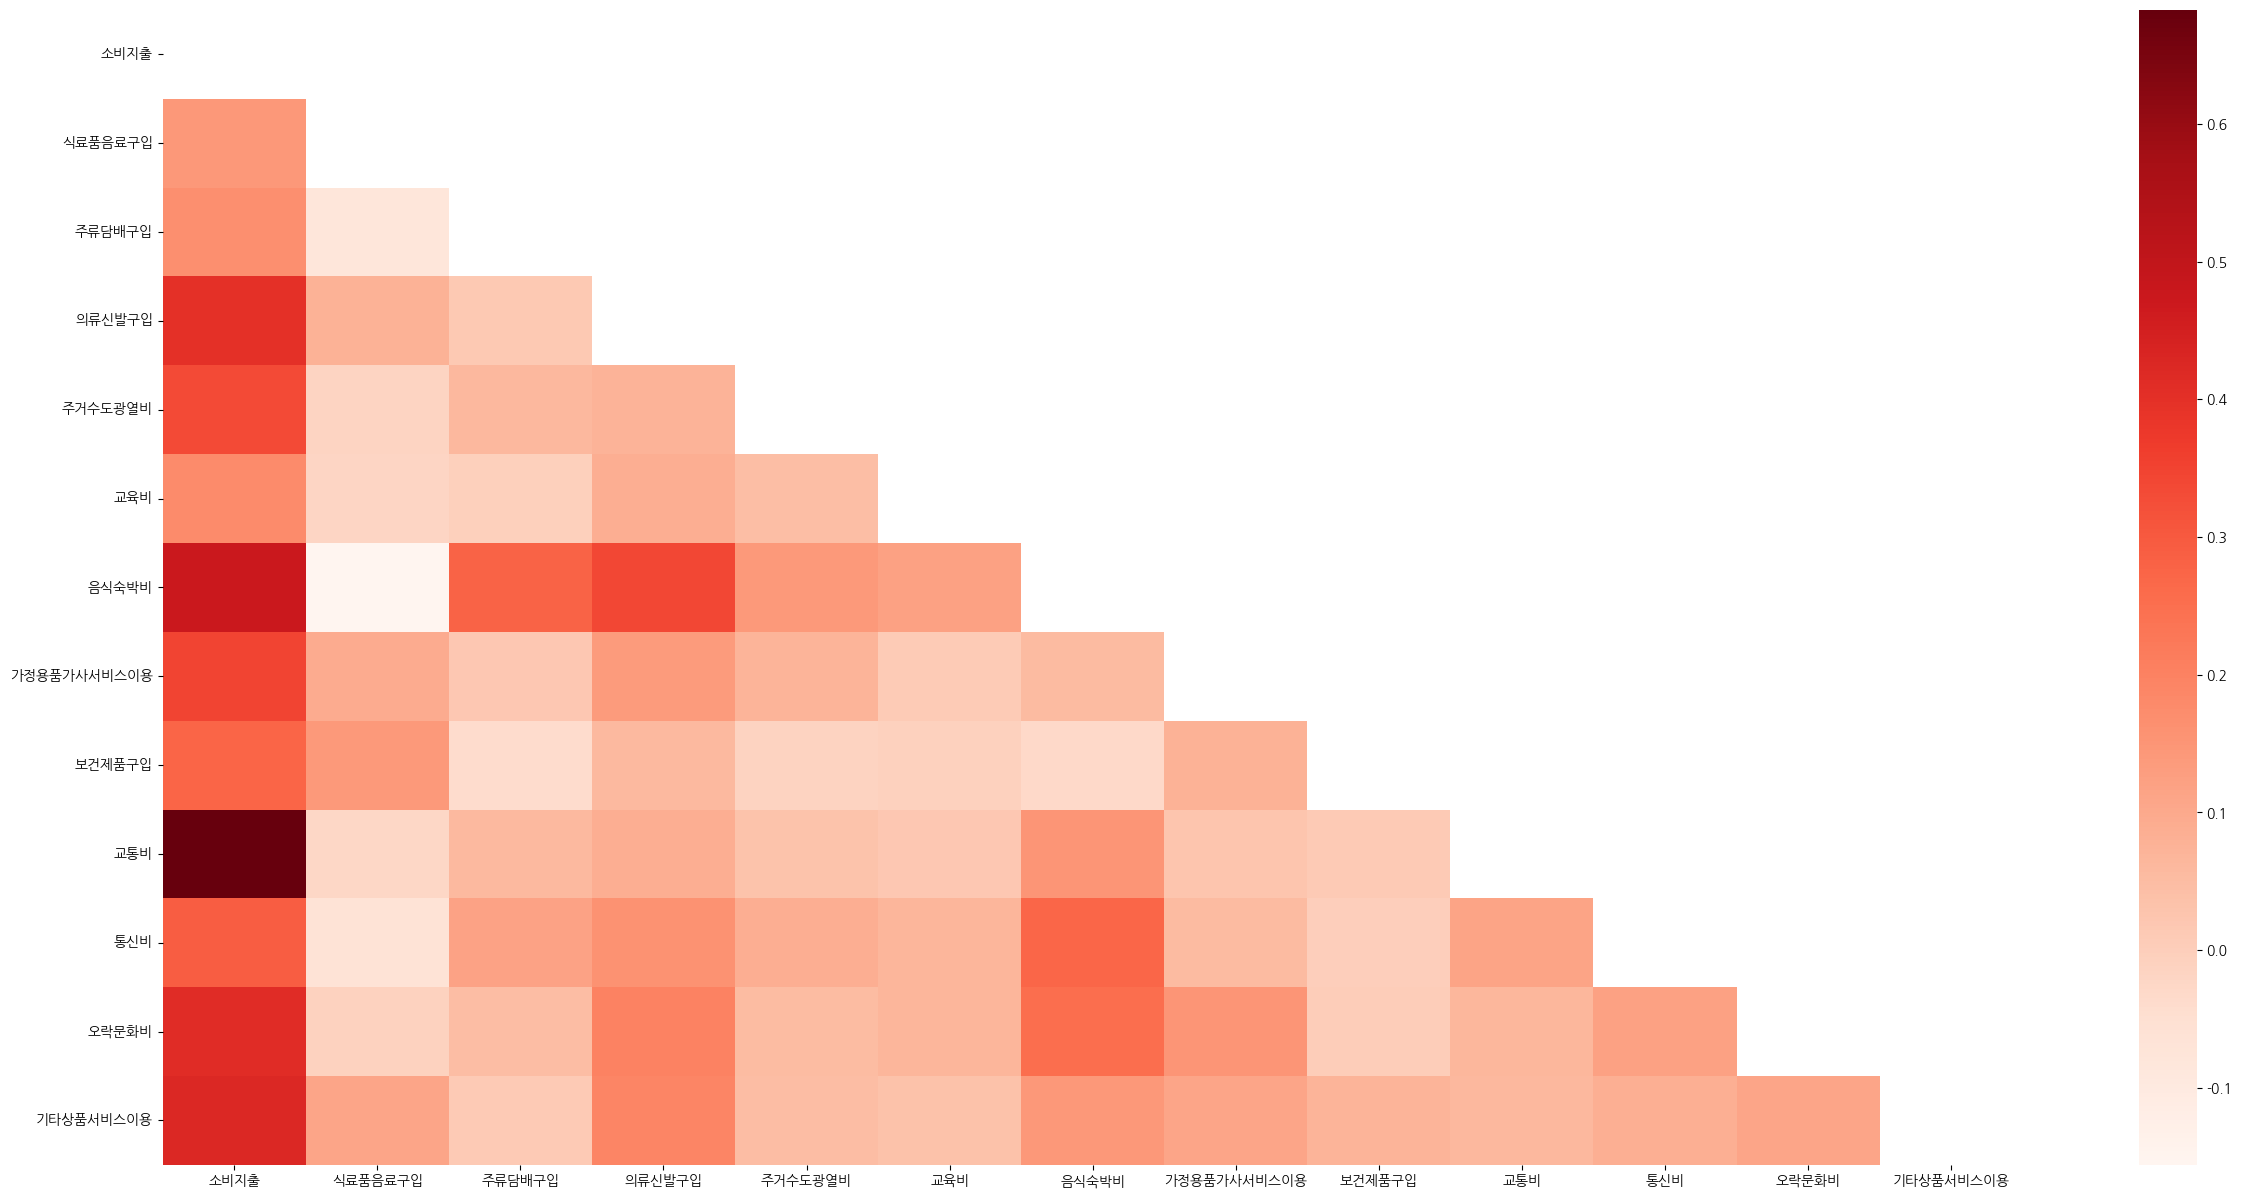

In [ ]:
plt.figure(figsize=(30,15))
mask = np.triu(np.ones_like(cov_single_data.corr(), dtype=bool))
sns.heatmap(cov_single_data.corr(), annot=True, fmt='0.2f', mask=mask, cmap='Reds')
plt.show()

교통비(0.68)<br>
음식숙박비(0.47)<br>
기타상품서비스이용(0.42)<br>

이상치 제거와 차이점 <br>
대체로 상관관계가 낮음

In [ ]:
single_data.head(2)

,Unnamed: 0,조사연월,가구일련번호,가구구분코드,가구원수,취업인원수,노인가구여부,배우자코드,가구주_성별코드,가구주_연령,...,기타서비스금액구입,비소비지출금액,경상조세,비경상조세,연금기여금,사회보장구입비,이자비용,가구간이전지출금액,비영리단체이전지출금액,도시읍면부구분코드
0,0,2019,1,2,1,0,0,2,2,64,...,0.0,99416,0,15190,0,0,4893,50000,29333,1
2,2,2019,3,2,1,0,0,3,1,58,...,0.0,9206,0,0,4050,3728,0,0,1429,1


In [ ]:
def age(가구주_연령):
    if 가구주_연령 < 20:
        return None  # 10대는 None으로 처리하여 제외
    elif 20 <= 가구주_연령 < 30:
        return '20대'
    elif 30 <= 가구주_연령 < 40:
        return '30대'
    elif 40 <= 가구주_연령 < 50:
        return '40대'
    elif 50 <= 가구주_연령 < 60:
        return '50대'
    elif 60 <= 가구주_연령 < 70:
        return '60대'
    else:
        return '70대 이상'

# 데이터 연령대별 구분
single_data.loc[:, '연령대'] = single_data['가구주_연령'].apply(age)
single_data = single_data.dropna()  # None 값을 가진 행 제외
single_data.연령대

C:\Users\Master\AppData\Local\Temp\ipykernel_17736\2735709248.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  single_data.loc[:, '연령대'] = single_data['가구주_연령'].apply(age)
C:\Users\Master\AppData\Local\Temp\ipykernel_17736\2735709248.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_data.loc[:, '연령대'] = single_data['가구주_연령'].apply(age)


0           60대
2           50대
4           50대
5           30대
12       70대 이상
          ...  
59850    70대 이상
59853    70대 이상
59857    70대 이상
59862    70대 이상
59866       50대
Name: 연령대, Length: 18232, dtype: object

1인가구 소비

In [ ]:
single_extend = single_data[["소비지출", "식대", "소득구간코드", "의류신발구입", "사회보장구입비", "음식숙박비", "교통비","기타상품서비스이용"]]
single_extend.head()

,소비지출,식대,소득구간코드,의류신발구입,사회보장구입비,음식숙박비,교통비,기타상품서비스이용
0,0.006063,0.013207,1,0.004157,0,0.008748,0.000527,0.002412
2,0.020275,0.035402,1,0.016485,3728,0.023449,0.000580,0.000926
4,0.091025,0.070202,2,0.070026,50121,0.046499,0.001236,0.037175
5,0.017480,0.045478,1,0.001557,0,0.030123,0.002080,0.000827
12,0.008972,0.000975,2,0.005598,0,0.000646,0.000033,0.000968


In [ ]:
## [전처리]

import pandas as pd

# 행의 개수 반환
nrow = single_extend.shape[0]
print(nrow)

# 결측치가 있는지 여부 확인
missingvalue = single_extend.isna().sum().sum() > 0

# 결과 출력 FALSE 출력시 결측치 없음을 의미함.
print(missingvalue)

18232
False


In [ ]:
# !pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# 회귀분석 모델 생성
lm = LinearRegression()

# 독립변수(x)와 종속변수(y) 설정

x = single_extend[["음식숙박비", "교통비", "기타상품서비스이용"]]

y = single_extend['소비지출']

# 모델 학습
lm.fit(x, y)

# 회귀계수 출력
print("회귀계수:", lm.coef_)
print("절편:", lm.intercept_)

회귀계수: [0.12296982 0.97241657 0.52117689]
절편: 0.010166831119802097


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# 회귀식 생성
regression_equation = "소비지출 = {:.2f}".format(lm.intercept_)
for i, coef in enumerate(lm.coef_):
    regression_equation += " + {:.2f} * {}".format(coef, x.columns[i])

print("회귀모형:")
print(regression_equation)

회귀모형:
소비지출 = 0.01 + 0.12 * 음식숙박비 + 0.97 * 교통비 + 0.52 * 기타상품서비스이용


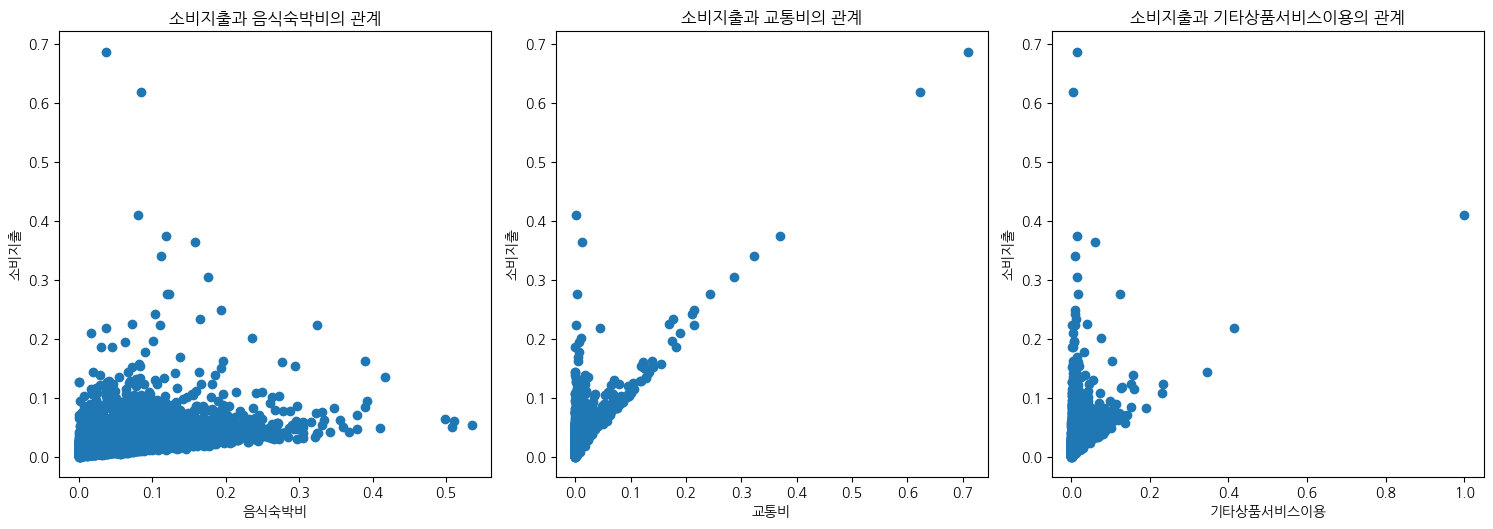

In [ ]:
import matplotlib.pyplot as plt

# Reshape y to a 1D array
y = y.values.reshape(-1)

# 그래프의 전체 사이즈 설정
plt.figure(figsize=(20, 10))

# 각 독립변수에 대한 scatter plot을 그리기
for i, col in enumerate(x.columns, 1):
    plt.subplot(2, 4, i)
    plt.scatter(x[col], y)
    plt.xlabel(col)
    plt.ylabel('소비지출')
    plt.title('소비지출과 ' + col + '의 관계')

# 그래프 출력
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#통계프로그램 패키지 가져오기
from scipy.stats import chisquare
from scipy import stats
import scipy as sp

import statsmodels.api as sm
from statsmodels.formula.api import ols, logit, glm

In [ ]:
single_extend.corr(method='pearson')

,소비지출,식대,소득구간코드,의류신발구입,사회보장구입비,음식숙박비,교통비,기타상품서비스이용
소비지출,1.000000,0.463877,0.477207,0.398202,0.357607,0.474053,0.683022,0.424156
식대,0.463877,1.000000,0.541080,0.327182,0.459668,0.987713,0.146675,0.140156
소득구간코드,0.477207,0.541080,1.000000,0.314791,0.706458,0.545662,0.175364,0.234440
의류신발구입,0.398202,0.327182,0.314791,1.000000,0.266966,0.339798,0.087674,0.192962
사회보장구입비,0.357607,0.459668,0.706458,0.266966,1.000000,0.463006,0.133408,0.155693
음식숙박비,0.474053,0.987713,0.545662,0.339798,0.463006,1.000000,0.149869,0.145504
교통비,0.683022,0.146675,0.175364,0.087674,0.133408,0.149869,1.000000,0.061563
기타상품서비스이용,0.424156,0.140156,0.234440,0.192962,0.155693,0.145504,0.061563,1.000000


In [ ]:
ols(formula='소비지출 ~ 음식숙박비 + 교통비 + 기타상품서비스이용', data=single_extend).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   소비지출   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 1.558e+04
Date:                Wed, 08 May 2024   Prob (F-statistic):               0.00
Time:                        16:47:31   Log-Likelihood:                 59353.
No. Observations:               18232   AIC:                        -1.187e+05
Df Residuals:                   18228   BIC:                        -1.187e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0102   9.97e-05    102.001      0.000       0.010       0.010
음식숙박비          0.1230      0.001     83.150      0.000       0.120       0.126
교통비            0.9724      0.006    154.189      0.000       0.960       0.985
기타상품서비스이용      0.5212      0.006     85.171      0.000       0.509       0.533
==============================================================================
Omnibus:                    21652.569   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8164641.654
Skew:                           5.879   Prob(JB):                         0.00
Kurtosis:                     106.002   Cond. No.                         92.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""